# Gradient Divergence Curl

This notebook shows some basic vector algebra

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm  # colormaps


<IPython.core.display.Javascript object>


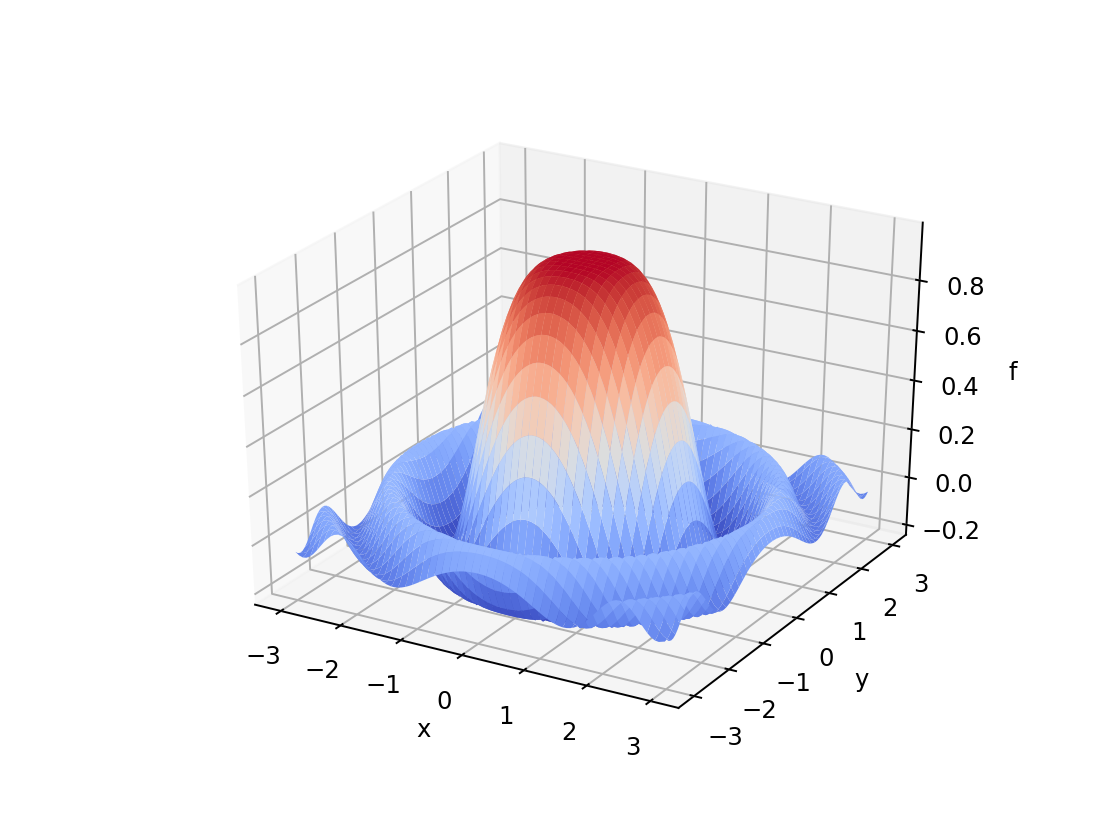

[Text(0.5, 0, 'f'), Text(0.5, 0, 'y'), Text(0.5, 0, 'x')]

In [60]:
# Notes: 2D Gradient visualization
# f(x,y) = sin(r)/r, where r= x^2+y^2

x0 = np.linspace(-3,3,100)
y0 = np.linspace(-3,3,100)
x,y = np.meshgrid(x0,y0)
r = y**2+x**2
theta = np.arctan2(y,x)
z = np.sin(r)/r

%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x,y,z, cmap=cm.coolwarm,  linewidth=0, antialiased=True)
ax.set(xlabel='x', ylabel='y', zlabel='f')


<IPython.core.display.Javascript object>


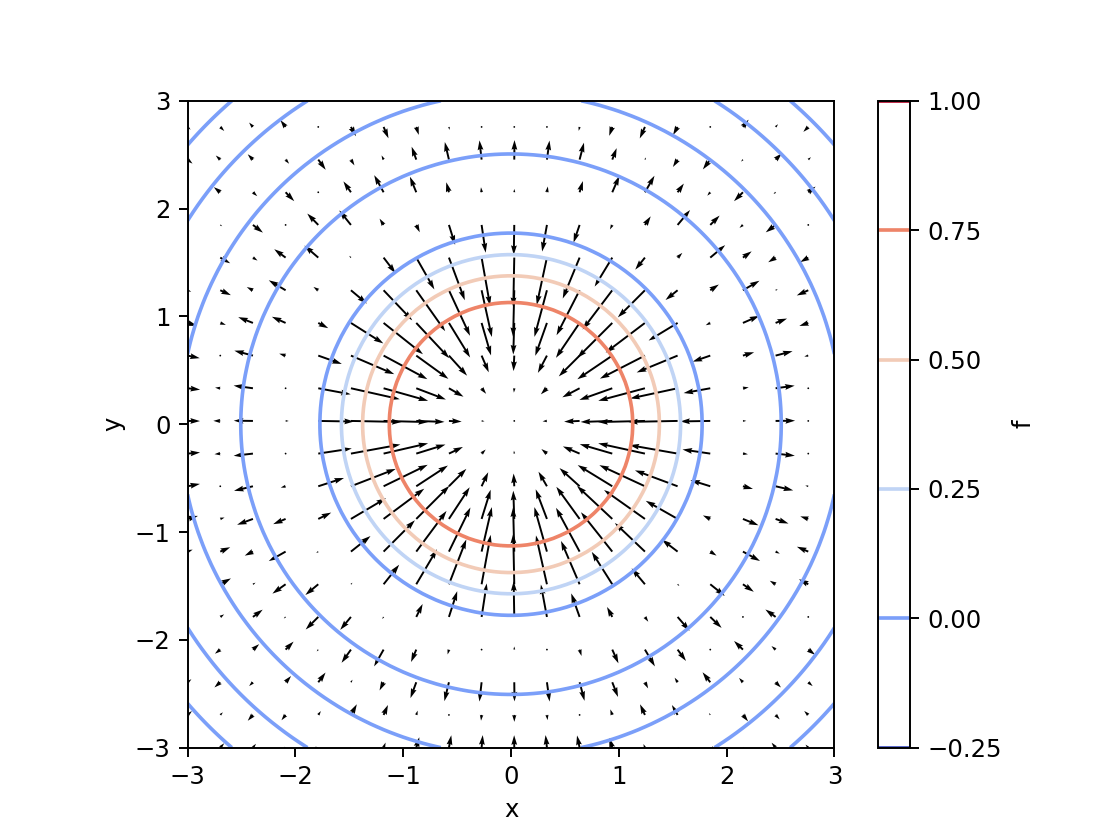

Text(0, 0.5, 'y')

In [61]:
# Notes: 2D Gradient visualization
# Contour and gradient plot

# Calculate gradient
gr = (1/r)*np.cos(r) - (1/r**2)*np.sin(r)
gx = gr*np.cos(theta)
gy = gr*np.sin(theta)
#g = np.gradient(z, 2)

# Plot
subsample = 5
fig, ax = plt.subplots(1,1,dpi=100)
ax.quiver(x[::subsample, ::subsample],y[::subsample, ::subsample],
          gx[::subsample, ::subsample], gy[::subsample, ::subsample])
ax.set_aspect('equal', 'box')
cs = ax.contour(x, y, z, levels=5,cmap=cm.coolwarm)
plt.colorbar(cs, label='f')
ax.set_xlabel('x')
ax.set_ylabel('y')



<IPython.core.display.Javascript object>


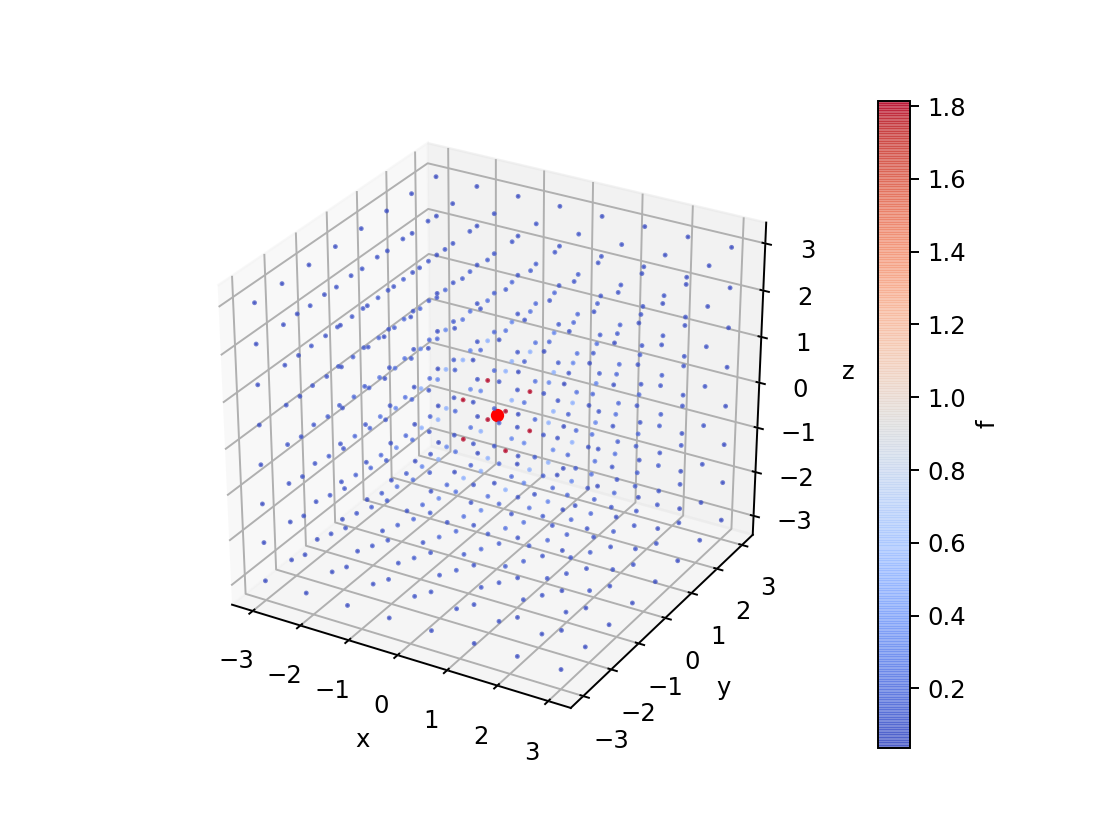

[Text(0.5, 0, 'z'), Text(0.5, 0, 'y'), Text(0.5, 0, 'x')]

In [62]:
# Notes: 3D Gradient visualization
# f(x,y,z) = 1/r

# Compute f in a 3D grid
xyz_inc = np.linspace(-3,3,8)
x,y,z = np.meshgrid(xyz_inc,xyz_inc,xyz_inc)
r = z**2+y**2+x**2
f = 1/r

%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')

# Draw a dot to represent the heat source in middle
ax.scatter(0,0,0,s=20, c='r')

# Draw a scatter plot with colors to represent temperature in 3D space
cs = ax.scatter(x,y,z,c=f.flatten(), cmap=cm.coolwarm, s=1, alpha=0.7)
plt.colorbar(cs, label='f')
ax.set(xlabel='x', ylabel='y', zlabel='z')



<IPython.core.display.Javascript object>


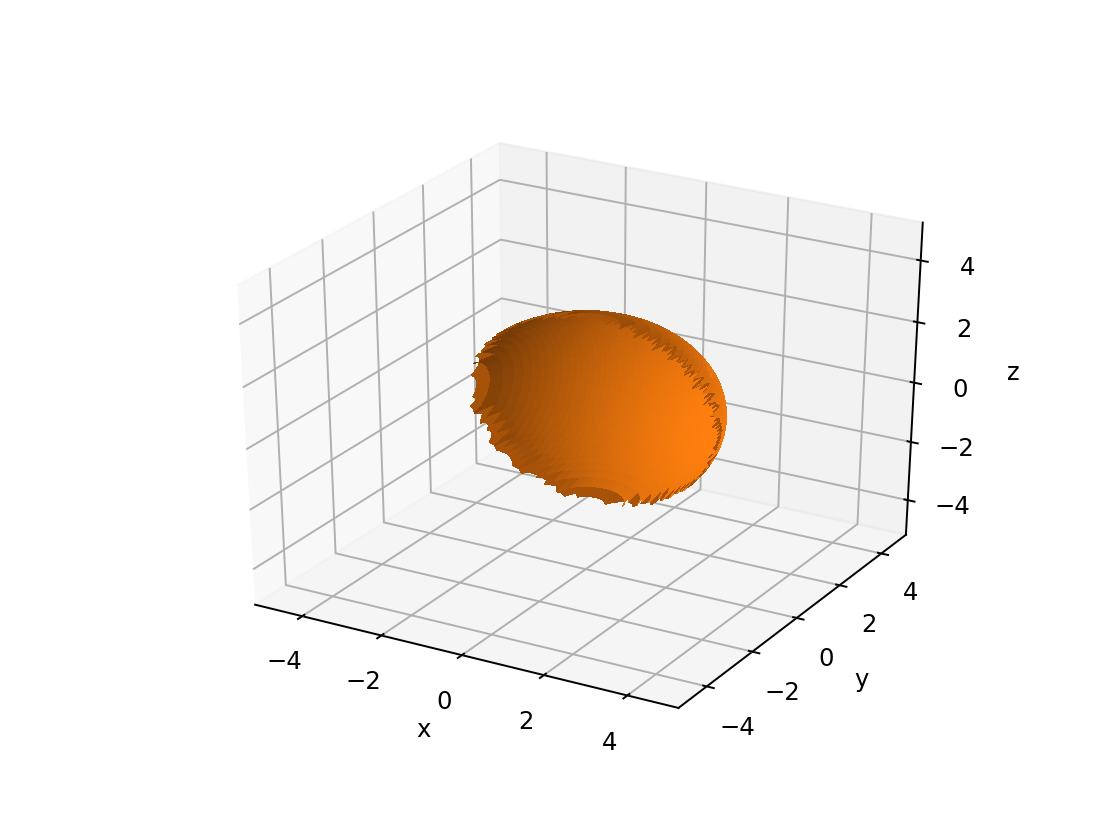

C:\Users\amarb\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


[(-5, 5), (-5, 5), (-5, 5)]

In [63]:
# Notes: 3D Gradient visualization
# f(x,y,z) = 1/r

# Draw an level surface (isosurface) plot

%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')

# The level surfaces in this case will be spheres
# We 
for R in [1,3]:
    N = 200
    xs, zs = np.meshgrid(np.linspace(-R,R,N), np.linspace(-R,R,N))
    rs = np.sqrt(xs**2+zs**2)
    ys = np.sqrt(R**2-rs**2)
    ax.plot_surface(xs, ys, zs, linewidth=0, antialiased=False)

ax.set(xlabel='x', ylabel='y', zlabel='z')
ax.set(xlim=[-5,5], ylim=[-5,5],zlim=[-5,5])




<IPython.core.display.Javascript object>


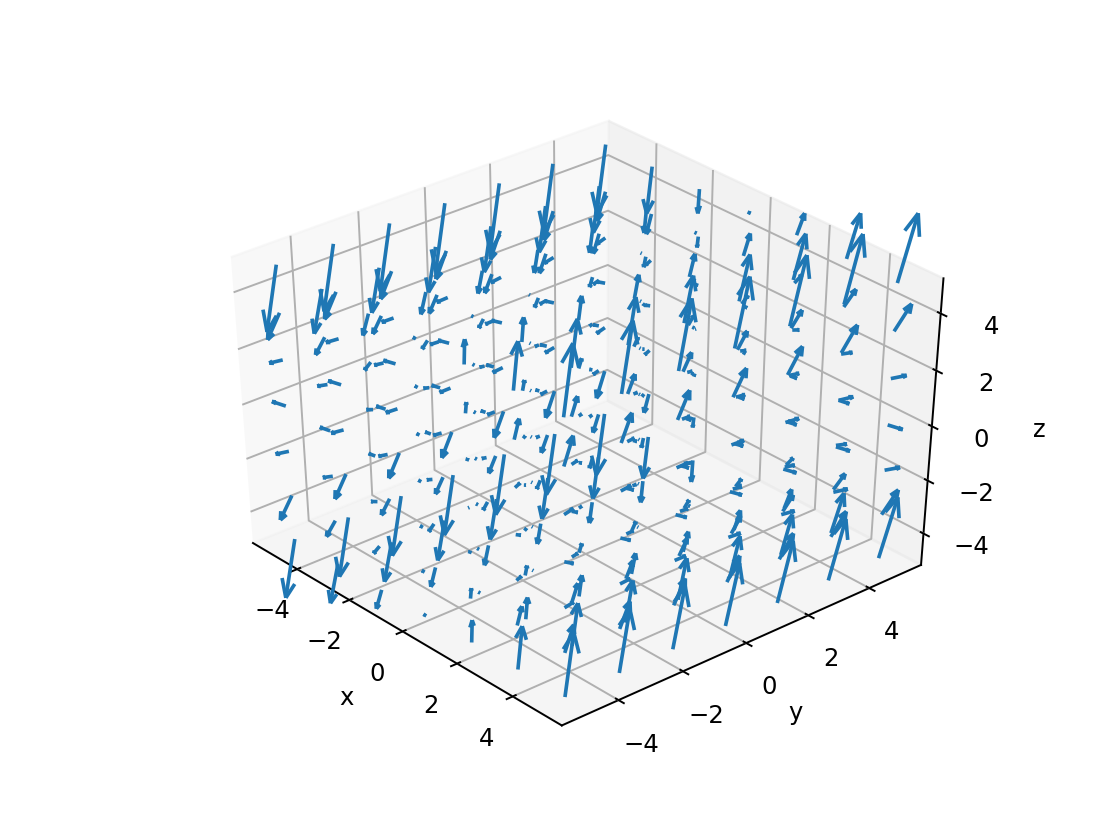

[Text(0.5, 0, 'z'), Text(0.5, 0, 'y'), Text(0.5, 0, 'x')]

In [78]:
# In class example of plotting vector field and divergence
# A = <3x+y, x, xz^2>

# Equally spaced grid in x, y, and z
grid = np.linspace(-5,5,7)
x,y,z = np.meshgrid(grid, grid, grid)

# Create the vector field at all points x,y,z
u = 3*x+y
v = x
w = x*z**2

# Plot figure
# 3D quiver has different syntax
# https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?highlight=quiver%203d#mpl_toolkits.mplot3d.axes3d.Axes3D.quiver
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x,y,z,u,v,w, length=.02)  # Note the length parameter
ax.set(xlabel='x', ylabel='y', zlabel='z')



In [64]:
# HW 9
# Gradient example
# Scalar field T(x,y) = 2xy-yx+xz
# Find gradient at point 2,-1,0

# Create a 3D grid
# Number of points in x, y, and Z direction
N = 13
mn = -10
mx = 10
spacing = (mx-mn)/N
x0 = np.linspace(mn, mx, N)
x, y, z = np.meshgrid(np.linspace(mn, mx, N), np.linspace(mn, mx, N), np.linspace(mn, mx, N))
T = 2*x*y - y*x + x*z
print('T: ', T.shape)

# %matplotlib notebook
# fig = plt.figure(1)
# ax = fig.gca(projection='3d')
# ax.scatter(x,y,z,c=T.flatten(), s=4, alpha=0.8)

# Calculate the gradient field
dT = np.gradient(T,[x, x, x])
len(dT)
dT[0].shape
# Plot the gradient vector
# n = [1,-2,1]
# ax.quiver(x,y,z, 
#           [n[0]], 
#           [n[1]], 
#           [n[2]], 
#           color=['b'])

#plt.show()


T:  (13, 13, 13)


TypeError: invalid number of arguments

<IPython.core.display.Javascript object>


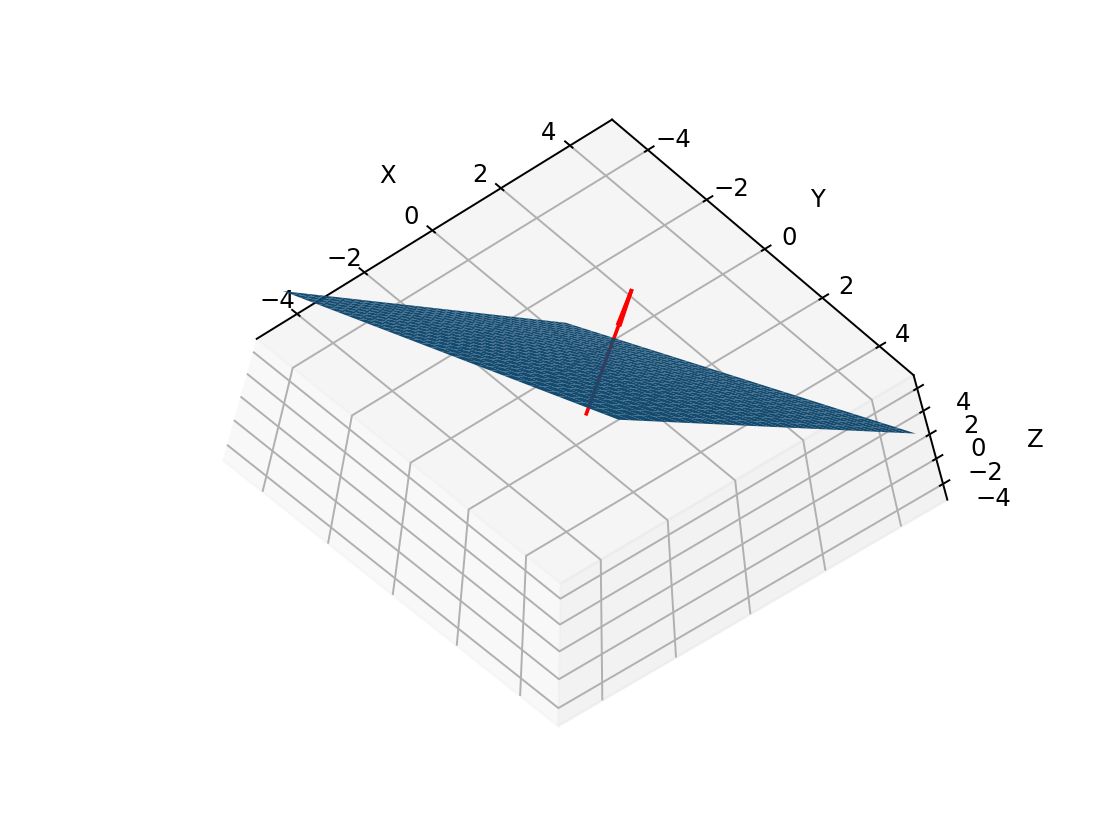

[(-5, 5),
 Text(0.5, 0, 'Z'),
 (-5, 5),
 Text(0.5, 0, 'Y'),
 (-5, 5),
 Text(0.5, 0, 'X')]

In [38]:
# Homework Q7
# Plot a plane 
# Plane equation: 3x-2y+z=5 => z = -3x+2y+5

# Plot the plane
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
x, y = np.meshgrid(x, y)
z = -3*x + 2*y+5

# Plot it
%matplotlib notebook 
fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z)
plt.show()

# Plot the normal vector
n = [3,-2,1]
ax.quiver(0,0,0, n[0],n[1],n[2],color=['r'])
ax.set(xlabel='X', ylabel='Y', zlabel='Z', xlim=[-5,5], ylim=[-5,5], zlim=[-5,5])